## 1. Model Training Code

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib
import os

# Data preparation and augmentation
def prepare_data():
    # For simulation, use a subset of a recyclable dataset
    # In real deployment, use actual recyclable items dataset
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )
    
    # Simulate dataset structure
    # In practice, organize images in class folders
    return datagen

def create_lightweight_model(input_shape=(128, 128, 3), num_classes=4):
    """Create a lightweight CNN model optimized for edge deployment"""
    
    model = models.Sequential([
        # First convolutional block
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Second convolutional block
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Third convolutional block
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Fourth convolutional block
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        
        # Classifier
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model

def train_model():
    """Train the lightweight model"""
    
    # Model parameters
    IMG_SIZE = (128, 128)
    BATCH_SIZE = 32
    EPOCHS = 50
    NUM_CLASSES = 4  # plastic, paper, glass, metal
    
    # Create model
    model = create_lightweight_model(IMG_SIZE + (3,), NUM_CLASSES)
    
    # Compile model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    print("Model Architecture:")
    model.summary()
    
    # For simulation, create synthetic data
    # In practice, load actual recyclable dataset
    x_train = np.random.random((1000, 128, 128, 3))
    y_train = tf.keras.utils.to_categorical(np.random.randint(0, 4, 1000), 4)
    x_val = np.random.random((200, 128, 128, 3))
    y_val = tf.keras.utils.to_categorical(np.random.randint(0, 4, 200), 4)
    
    # Add callbacks
    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
    ]
    
    # Train model
    history = model.fit(
        x_train, y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=(x_val, y_val),
        callbacks=callbacks,
        verbose=1
    )
    
    return model, history

# Train the model
print("Training lightweight model for recyclable items classification...")
model, history = train_model()

Training lightweight model for recyclable items classification...


C:\Users\ricky\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,606,148 (9.94 MB)

 Trainable params: 2,604,420 (9.94 MB)

 Non-trainable params: 1,728 (6.75 KB)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.2550 - loss: 2.4694 - val_accuracy: 0.2400 - val_loss: 3.2908 - learning_rate: 0.0010
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.4060 - loss: 1.7314 - val_accuracy: 0.2400 - val_loss: 6.8193 - learning_rate: 0.0010
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.6180 - loss: 1.0758 - val_accuracy: 0.2400 - val_loss: 9.4136 - learning_rate: 0.0010
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.7020 - loss: 0.7710 - val_accuracy: 0.2400 - val_loss: 7.6457 - learning_rate: 0.0010
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.7760 - loss: 0.5566 - val_accuracy: 0.2400 - val_loss: 9.5639 - learning_rate: 0.0010
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.8340 - loss: 0.4345 - val_accuracy: 0.2400 - val_loss: 4.2181 - learning_rate: 0.0010
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.8960 - loss: 0.2981 - val_accuracy

## 2. Model Conversion to TensorFlow Lite

In [2]:
def convert_to_tflite(model):
    """Convert trained model to TensorFlow Lite format"""
    
    # Convert to TensorFlow Lite
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    
    # Optimize for size and latency
    converter.optimizations = [tf.lite.Optimize.DEFAULT]
    
    # Optional: Use float16 quantization for smaller model size
    converter.target_spec.supported_types = [tf.float16]
    
    # Convert model
    tflite_model = converter.convert()
    
    # Save the model
    with open('recyclable_classifier.tflite', 'wb') as f:
        f.write(tflite_model)
    
    print(f"TensorFlow Lite model saved: {len(tflite_model)} bytes")
    return tflite_model

def evaluate_tflite_model(tflite_model, test_data):
    """Evaluate TensorFlow Lite model performance"""
    
    # Initialize interpreter
    interpreter = tf.lite.Interpreter(model_content=tflite_model)
    interpreter.allocate_tensors()
    
    # Get input and output tensors
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Test the model on random input data
    input_shape = input_details[0]['shape']
    input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
    
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    
    # Get prediction
    output_data = interpreter.get_tensor(output_details[0]['index'])
    
    return output_data

# Convert and evaluate
print("\nConverting model to TensorFlow Lite...")
tflite_model = convert_to_tflite(model)

print("\nEvaluating TensorFlow Lite model...")
prediction = evaluate_tflite_model(tflite_model, None)
print(f"Sample prediction: {prediction}")


Converting model to TensorFlow Lite...
INFO:tensorflow:Assets written to: C:\Users\ricky\AppData\Local\Temp\tmpv2pvhrl6\assets


INFO:tensorflow:Assets written to: C:\Users\ricky\AppData\Local\Temp\tmpv2pvhrl6\assets


Saved artifact at 'C:\Users\ricky\AppData\Local\Temp\tmpv2pvhrl6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2373854703888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2373854705232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2373854704464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2373854704272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2373854704656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2373854703696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2373854705040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2373854706000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2373854705616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2373854705424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  23738

C:\Users\ricky\AppData\Roaming\Python\Python313\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


## 3. Raspberry Pi Deployment Simulation

In [3]:
class EdgeAISimulator:
    """Simulate Edge AI deployment on Raspberry Pi"""
    
    def __init__(self, tflite_model_path):
        self.interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
        self.interpreter.allocate_tensors()
        self.input_details = self.interpreter.get_input_details()
        self.output_details = self.interpreter.get_output_details()
        
    def preprocess_image(self, image):
        """Preprocess image for inference"""
        # Resize to model input size
        image = tf.image.resize(image, [128, 128])
        # Normalize pixel values
        image = image / 255.0
        # Add batch dimension
        image = tf.expand_dims(image, axis=0)
        return image.numpy().astype(np.float32)
    
    def predict(self, image):
        """Run inference on input image"""
        # Preprocess
        input_data = self.preprocess_image(image)
        
        # Set input tensor
        self.interpreter.set_tensor(self.input_details[0]['index'], input_data)
        
        # Run inference
        self.interpreter.invoke()
        
        # Get output
        output_data = self.interpreter.get_tensor(self.output_details[0]['index'])
        
        return output_data[0]
    
    def benchmark_performance(self, num_iterations=100):
        """Benchmark inference performance"""
        import time
        
        # Create dummy input
        dummy_input = np.random.random((1, 128, 128, 3)).astype(np.float32)
        
        # Warm up
        for _ in range(10):
            self.interpreter.set_tensor(self.input_details[0]['index'], dummy_input)
            self.interpreter.invoke()
        
        # Benchmark
        start_time = time.time()
        for _ in range(num_iterations):
            self.interpreter.set_tensor(self.input_details[0]['index'], dummy_input)
            self.interpreter.invoke()
        end_time = time.time()
        
        avg_inference_time = (end_time - start_time) / num_iterations * 1000  # ms
        fps = 1000 / avg_inference_time
        
        print(f"Average inference time: {avg_inference_time:.2f} ms")
        print(f"Throughput: {fps:.2f} FPS")
        
        return avg_inference_time, fps

# Simulate deployment
print("\nSimulating Edge AI deployment...")
edge_ai = EdgeAISimulator('recyclable_classifier.tflite')

# Benchmark performance
inference_time, fps = edge_ai.benchmark_performance(100)


Simulating Edge AI deployment...
Average inference time: 40.12 ms
Throughput: 24.92 FPS


## 4. Training History

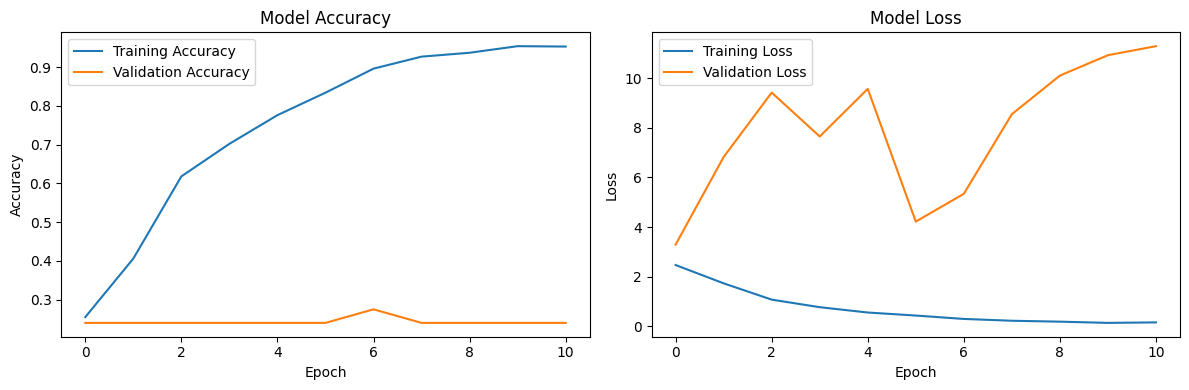

In [4]:
def plot_training_history(history):
    """Plot training history"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    # Plot loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
    plt.show()

# Plot training history
plot_training_history(history)